# The Perceptron

Based on a simple (the simplest) nerual net.

![http://i.stack.imgur.com/KUvpQ.png](http://i.stack.imgur.com/KUvpQ.png)


$h(x) = sign((\sum{w_ix_i}) - threshold)$

Can simplify by adding an artificial coordinate $x_0$ and $w_0$  where $x_0 = 1$ 

This makes it easy

$h(x) = sign(\sum{w_ix_i})$

or in vector notation

$h(x) = sign(w \cdot x)$



## So, how is this a learning system?

We need a learning algorithm

Supervised Learning requires a training set where we have some data and we know the answer.

1. Given a training set of $\vec x,\vec y$
2. Classify all of the points in $\vec x$
3. Pick a point $n$ from $\vec x$ that was misclassified
4. update the weight vector $\vec w$ using: $\vec w = \vec w + y_n \vec w_n$

Repeat 2 -- 4 until all points are classified correctly.  OR at some upper limit of iteration.


See https://datasciencelab.wordpress.com/2014/01/10/machine-learning-classics-the-perceptron/ for a nice writeup.

In [312]:
%matplotlib inline
import numpy as np
import random
import pandas as pd
import seaborn as sbn
sbn.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values


class IrisSelector(BaseEstimator, TransformerMixin):
    # sales tax = 0.075
    def __init__(self, variety):
        self.variety = variety

    def fit(self):
        return self

    def transform(self,df):
        result = df.copy()
        result['label'] = result.kind.map(lambda x: 1 if x == self.variety else -1)
        return result


In [313]:
#Some sample data
pts = [(4, 1),
 (4, 10),
 (3, 5),
 (4, 4),
 (8, 10),
 (6, 9),
 (7, 11),
 (5, 7),
 (4, 2),
 (2, 3),
 (7, 6)
      ]


y = [-1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1]



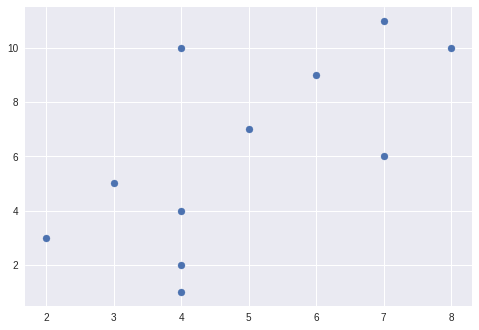

In [314]:
plt.scatter([x[0] for x in pts], [x[1] for x in pts])

In [315]:
#train = np.array([np.array(x) for x in pts])
train = pd.DataFrame(pts).values


In [416]:
from sklearn.base import BaseEstimator, TransformerMixin

class Perceptron(BaseEstimator, TransformerMixin):

    def __init__(self, class_map={-1:-1, 1: 1}):
        super().__init__()
        self.w = []
        self.statistics_ = []
        self.class_map = class_map

    def fit(self, ts, cls):
        ts = self.transform(ts)  # add 1.0 as zeroth element to each row.
        self.w = np.array([random.random() for x in range(len(ts[0]))])
        done = False
        count = 0
        best_score = len(ts)
        best_w = self.w.copy()

        while not done and count < 100000:
            count += 1
            correct = []
            incorrect = []

            # first classify all points
            for ix,i in enumerate(ts):
                if np.sign(np.dot(i,self.w)) == cls[ix]:
                    correct.append(ix)
                else:
                    incorrect.append(ix)

            if len(incorrect) < best_score:
                best_score = len(incorrect)
                best_w = self.w.copy()
            if len(incorrect) == 0:
                print("Done!",self.w)
                done = True
            else:
                p = random.randrange(len(incorrect))
                x = ts[incorrect[p]]
                self.w = self.w + x*cls[incorrect[p]]
        
        self.statistics_ = [count, best_score]
        self.w = best_w.copy()

    def transform(self, data):
        return np.c_[np.array([1.0]*len(data)),data]

    def decision_function(self, tset):
        tset = self.transform(tset)
        scores = []
        for s in tset:
            scores.append(np.dot(s, self.w))

        return scores

    def predict(self, tset):
        tset = self.transform(tset)
        predictions = []
        for s in tset:
            predictions.append(self.class_map[np.sign(np.dot(s, self.w))])

        return predictions

        




In [345]:

np.array([np.array([1,1]), np.array([8,8])],ndmin=2)

array([[1, 1],
       [8, 8]])

In [346]:
#ptron = Perceptron()
#ptron.fit(train,y)
#ptron.predict(np.array([np.array([1,1]), np.array([8,8])], ndmin=2))

In [348]:
plt.scatter(train[:,0], train[:,1])
vec = ptron.w
l = np.linspace(2,8)
aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
plt.plot(l, aa*l+bb, 'g-', lw=2)
plt.show()

TypeError: unhashable type: 'slice'

## Lets look at a classic dataset in machine learning.  The iris dataset

Attribute Information:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class: 
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

Since we only can do a binary classification right now, lets look at setosa versus virginica


In [349]:
iris = pd.read_csv('/home/faculty/millbr02/pub/iris.csv',header=None)
iris.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']
iris.head()

,sepallen,sepalwidth,petallen,petalwidth,kind
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


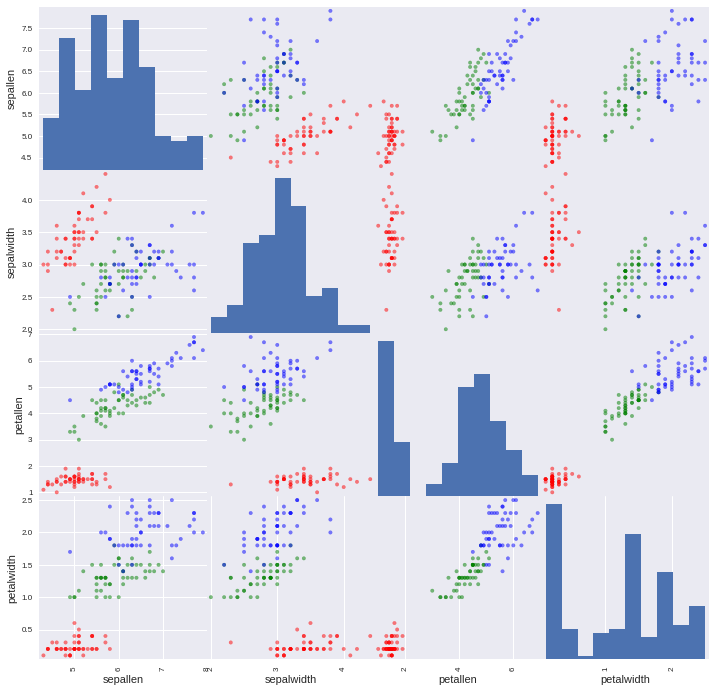

In [350]:
#c = df[(df.kind == 'Iris-setosa') | (df.kind == 'Iris-virginica')]
#sbn.pairplot(c[['sepallen','sepalwidth','petallen','petalwidth']])
from pandas.tools.plotting import scatter_matrix
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
scatter_matrix(iris, figsize=(12,12),c=iris.kind.map(lambda x: colors[x]))
plt.show()

### Modify the dataset into a test set and training set then train your perceptron on the Setosa - Verginica split

In [351]:
#d = {'Iris-setosa': 1, 'Iris-versicolor': -1, 'Iris-virginica': -1}
#iris['label'] = iris.kind.map(lambda x : d[x])
#iris.head()

vtrans = IrisSelector('Iris-versicolor')
iris_labeled = vtrans.transform(iris[iris.kind != 'Iris-setosa'])
iris_labeled.head()

,sepallen,sepalwidth,petallen,petalwidth,kind,label
50,7.0,3.2,4.7,1.4,Iris-versicolor,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,1
52,6.9,3.1,4.9,1.5,Iris-versicolor,1
53,5.5,2.3,4.0,1.3,Iris-versicolor,1
54,6.5,2.8,4.6,1.5,Iris-versicolor,1


In [352]:
train, test = train_test_split(iris_labeled, train_size=.8, stratify=iris_labeled.label)

In [353]:
labels = train.label
train = train.drop(['kind', 'label'], axis=1)
train.head()

,sepallen,sepalwidth,petallen,petalwidth
115,6.4,3.2,5.3,2.3
63,6.1,2.9,4.7,1.4
138,6.0,3.0,4.8,1.8
68,6.2,2.2,4.5,1.5
73,6.1,2.8,4.7,1.2


### When making predictions with the test set, what percentage do you predict correctly?

In [354]:
from sklearn.linear_model import SGDClassifier

In [355]:
ptron = Perceptron()
ptron.fit(train.values, labels.values)

In [356]:
ptron.statistics_


[100000, 2]

In [357]:
tlabels = test.label
test = test.drop(['kind', 'label'], axis=1)
test.head()


,sepallen,sepalwidth,petallen,petalwidth
122,7.7,2.8,6.7,2.0
142,5.8,2.7,5.1,1.9
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
87,6.3,2.3,4.4,1.3


In [358]:
preds = ptron.predict(test.values)

(array([ 10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  10.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 50 Patch objects>)

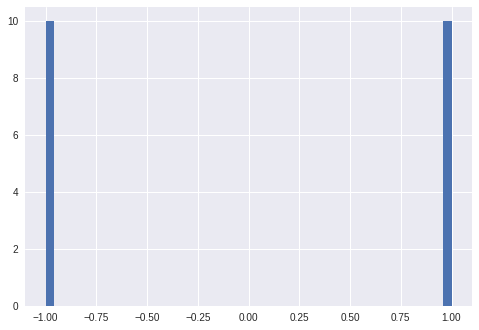

In [359]:
plt.hist(preds, bins=50)

In [360]:
(preds == tlabels).value_counts()

True    20
Name: label, dtype: int64

In [361]:
confusion_matrix(tlabels.values, preds)

array([[10,  0],
       [ 0, 10]])

In [362]:
print("precision: ", precision_score(tlabels.values, preds))
print("recall: ", recall_score(tlabels.values, preds))

precision:  1.0
recall:  1.0


### Does your class work with the cross_validation function?

In [363]:
cvlabels = iris_labeled.label
cvdata = iris_labeled.drop(['kind','label'],axis=1)

In [364]:
ptron = Perceptron()
cross_val_score(ptron, cvdata.values, cvlabels.values, cv=6, scoring="accuracy", n_jobs=-1)

Done! [ 3.13579195  4.77779571  8.49259657 -9.58951733 -7.46084529]


array([ 1.        ,  0.70588235,  0.94117647,  1.        ,  0.75      ,  1.        ])

### Make a confusion matrix.

* True Positive = Predict it is a Setosa and it is!
* True Negative = Predict it is not a Setosa and it is not
* False Positive = Predict it is a Setosa and it is not
* False Negative = Predict it is not a Setosa but it is


In [365]:
cvpreds = cross_val_predict(ptron, cvdata.values, cvlabels.values, cv=6, n_jobs=-1)
confusion_matrix(cvlabels.values, cvpreds)

Done! [ 14.86498157  22.52065092  20.6217535  -35.66721782 -24.68579417]


array([[46,  4],
       [ 4, 46]])

### compute the precision and recall values


$$precision = \frac{TP}{TP+FP}$$

$$recall = \frac{TP}{TP+FN}$$

In [366]:
from sklearn.metrics import precision_score, recall_score
precision_score(cvlabels.values, cvpreds)


0.92000000000000004

In [367]:
recall_score(cvlabels.values, cvpreds)

0.92000000000000004

In [368]:
from sklearn.metrics import f1_score
f1_score(cvlabels.values, cvpreds)

0.92000000000000004

### Plot an ROC curve

In [369]:
from sklearn.model_selection import cross_val_predict
ptron = Perceptron()
y_scores = cross_val_predict(ptron, cvdata.values, cvlabels.values, cv=4, n_jobs=-1, method="decision_function")

Done! [ 105.41444017   66.29448781   97.64576829  -83.48094062 -211.7864168 ]
Done! [ 146.31789586  104.6804808    99.6001402  -167.26139011 -155.40730992]


In [370]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(cvlabels.values, y_scores)

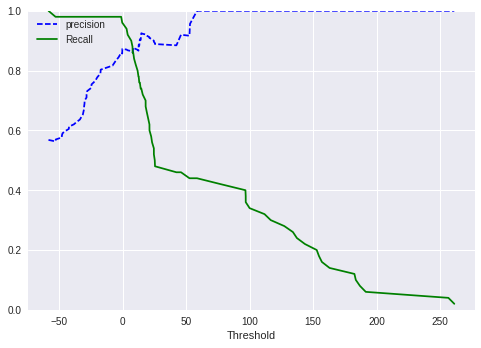

In [371]:
plt.plot(thresholds, precisions[:-1], 'b--', label="precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

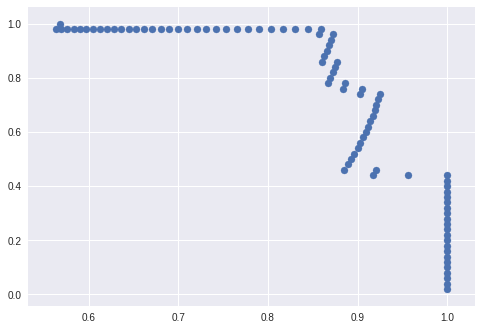

In [372]:
plt.scatter(precisions[:-1], recalls[:-1])

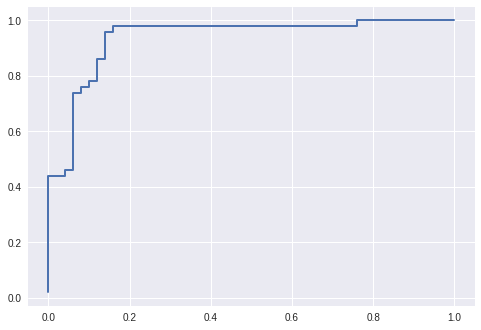

In [373]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(cvlabels.values, y_scores)
plt.plot(fpr, tpr, linewidth=2)


### Create a new class that allows you to fit the data to three classes -- You will need more than one perceptron...

In [430]:
class PerceptronMultiClassifier(BaseEstimator, TransformerMixin):

    def __init__(self):
        super().__init__()
        self.ptrons = []

    def fit(self, train, labels):
        num_classes = len(np.unique(labels))
        train1 = np.array([x for ix, x in enumerate(train) if labels[ix] == 1 or labels[ix] == 2], ndmin=2)
        train2 = np.array([x for ix, x in enumerate(train) if labels[ix] == 1 or labels[ix] == 3], ndmin=2)
        train3 = np.array([x for ix, x in enumerate(train) if labels[ix] == 2 or labels[ix] == 3], ndmin=2)
        labs1 = [x for x in labels if x == 1 or x == 2]
        labs2 = [x for x in labels if x == 1 or x == 3]
        labs3 = [x for x in labels if x == 2 or x == 3]
        map1 = {1:-1, 2:1}
        map2 = {1:-1, 3:1}
        map3 = {2:-1, 3:1}
        labs1 = [map1[x] for x in labs1]
        labs2 = [map2[x] for x in labs2]
        labs3 = [map3[x] for x in labs3]

        p1 = Perceptron(class_map={-1:1, 1:2})
        p2 = Perceptron(class_map={-1:1, 1:3})
        p3 = Perceptron(class_map={-1:2, 1:3})

        p1.fit(train1, labs1)
        p2.fit(train2, labs2)
        p3.fit(train3, labs3)
        self.ptrons = [p1, p2, p3]

    def predict(self, tset):
        p1 = self.ptrons[0].predict(test)
        p2 = self.ptrons[1].predict(test)
        p3 = self.ptrons[2].predict(test)

        res = []
        for i in range(len(p1)):
            votes = [0, 0, 0, 0]
            votes[p1[i]] += 1
            votes[p2[i]] += 1
            votes[p3[i]] += 1
            print(votes)
            res.append(votes.index(max(votes)))

        return res
            


In [402]:
iris = pd.read_csv('/home/faculty/millbr02/pub/iris.csv',header=None)
iris.columns = ['sepallen','sepalwidth','petallen','petalwidth','kind']
md = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
iris_labeled = iris.copy()
iris_labeled['label'] = iris.kind.map(lambda x: md[x])
train, test = train_test_split(iris_labeled, train_size=.8, stratify=iris_labeled.label)
y = train.label
train = train.drop(['kind', 'label'], axis=1)

In [431]:
ptron = PerceptronMultiClassifier()
ptron.fit(train.values, y.values)

Done! [-0.60016465 -1.21933391 -7.04898741  7.23574215  2.75874327]
Done! [-0.24791941 -0.67923006 -4.25306726  8.61274124  3.98755592]


In [414]:
yp = test.label
test = test.drop(['kind','label'], axis=1)

In [432]:
res = ptron.predict(test.values)


[0, 0, 2, 1]
[0, 0, 1, 2]
[0, 0, 2, 1]
[0, 0, 2, 1]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 2, 1]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 1, 2]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 2, 1]
[0, 0, 1, 2]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 1, 2]
[0, 2, 1, 0]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 2, 1, 0]
[0, 0, 1, 2]
[0, 2, 1, 0]
[0, 0, 2, 1]
[0, 2, 1, 0]
[0, 0, 1, 2]
[0, 0, 1, 2]
[0, 0, 2, 1]


In [428]:
count = 0
for i in range(len(res)):
    if res[i] == yp.values[i]:
        count += 1
count / len(res)


0.9333333333333333

In [429]:
confusion_matrix(yp.values, res)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [433]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

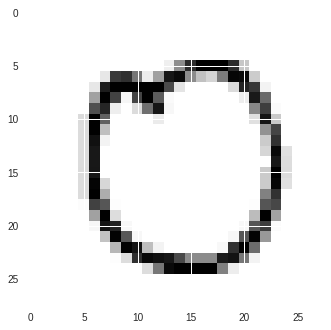

In [435]:
plt.imshow(mnist.data[28].reshape(28,28))

In [446]:
im_123 = np.array([ x for ix, x in enumerate(mnist.data) if mnist.target[ix] in (1, 2, 3)], ndmin=2)

In [447]:
ylabels = np.array([x for x in mnist.target if x in (1,2,3)])

In [449]:
imptron = PerceptronMultiClassifier()

In [ ]:
imptron.fit(im_123, ylabels)

ValueError: shapes (5,) and (785,) not aligned: 5 (dim 0) != 785 (dim 0)

In [467]:
len(im_123[0])


784